### 종속변수 데이터 분포 보는 plot
* line plot, bar plot, histogram, heat map, pie chart
* x: 생활인구당 평균매출, y: 데이터 개수

In [450]:
# 필요 라이브러리 import
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

mamm_full = pd.read_csv("../../../resources/processedData/매머드_full_feature_clustered_실패.csv", index_col=False)

In [451]:
mamm_full

,매장코드_영업일자_시간대,매장코드,매장명,기준일ID,주중/주말,시간대구분,상업지역 면적,평균생활인구수,평균매출,생활인구당 평균매출,실패여부,평균생활인구수_cl,상업지역 면적_cl
0,S53661_20190201_1,S53661,MMTH 역삼점,2019-02-01,0,1.0,203448.20,102461.88,37033.33,3614.35,1,중,상
1,S53661_20190201_2,S53661,MMTH 역삼점,2019-02-01,0,2.0,203448.20,149401.14,42600.00,2851.38,1,상,상
2,S53661_20190201_3,S53661,MMTH 역삼점,2019-02-01,0,3.0,203448.20,130305.51,17400.00,1335.32,1,상,상
3,S53661_20190207_1,S53661,MMTH 역삼점,2019-02-07,0,1.0,203448.20,94200.97,63225.00,6711.71,0,중,상
4,S53661_20190207_2,S53661,MMTH 역삼점,2019-02-07,0,2.0,203448.20,144196.27,34325.00,2380.44,1,상,상
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,T64222_20190227_4,T64222,MMTH 역삼GFC점,2019-02-27,0,4.0,103356.25,93636.11,45325.00,4840.55,1,중,하
1422,T64222_20190228_1,T64222,MMTH 역삼GFC점,2019-02-28,0,1.0,103356.25,100872.60,70550.00,6993.97,0,중,하
1423,T64222_20190228_2,T64222,MMTH 역삼GFC점,2019-02-28,0,2.0,103356.25,146583.15,225000.00,15349.65,0,상,하
1424,T64222_20190228_3,T64222,MMTH 역삼GFC점,2019-02-28,0,3.0,103356.25,138484.15,83375.00,6020.54,0,상,하


In [452]:
# 그래프 출력의 원활함을 위해 생활인구당 평균매출 백의 자리까지 버리기 (histogram 외 그래프에 사용)
mamm_full_round = mamm_full.copy()
mamm_full_round["생활인구당 평균매출"] = np.trunc(np.trunc(mamm_full_round["생활인구당 평균매출"]) / 1000) * 1000   # 백의 자리까지 버리기
mamm_full_round["생활인구당 평균매출"] = mamm_full_round["생활인구당 평균매출"].astype(int)     # float -> int 로 변경
mamm_full_round

,매장코드_영업일자_시간대,매장코드,매장명,기준일ID,주중/주말,시간대구분,상업지역 면적,평균생활인구수,평균매출,생활인구당 평균매출,실패여부,평균생활인구수_cl,상업지역 면적_cl
0,S53661_20190201_1,S53661,MMTH 역삼점,2019-02-01,0,1.0,203448.20,102461.88,37033.33,3000,1,중,상
1,S53661_20190201_2,S53661,MMTH 역삼점,2019-02-01,0,2.0,203448.20,149401.14,42600.00,2000,1,상,상
2,S53661_20190201_3,S53661,MMTH 역삼점,2019-02-01,0,3.0,203448.20,130305.51,17400.00,1000,1,상,상
3,S53661_20190207_1,S53661,MMTH 역삼점,2019-02-07,0,1.0,203448.20,94200.97,63225.00,6000,0,중,상
4,S53661_20190207_2,S53661,MMTH 역삼점,2019-02-07,0,2.0,203448.20,144196.27,34325.00,2000,1,상,상
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,T64222_20190227_4,T64222,MMTH 역삼GFC점,2019-02-27,0,4.0,103356.25,93636.11,45325.00,4000,1,중,하
1422,T64222_20190228_1,T64222,MMTH 역삼GFC점,2019-02-28,0,1.0,103356.25,100872.60,70550.00,6000,0,중,하
1423,T64222_20190228_2,T64222,MMTH 역삼GFC점,2019-02-28,0,2.0,103356.25,146583.15,225000.00,15000,0,상,하
1424,T64222_20190228_3,T64222,MMTH 역삼GFC점,2019-02-28,0,3.0,103356.25,138484.15,83375.00,6000,0,상,하


* line plot

In [453]:
def linePlot(data, col):
    xy = np.array(sorted(Counter(data[col]).items()))
    tit = "강남구 매머드커피 " + col + " 분포"
    
    plt.figure(facecolor='white', figsize=(10, 5))

    plt.plot(xy[:, 0], xy[:, 1])
    plt.xlabel(col)
    plt.ylabel("개수")
    plt.title(tit, fontsize=15)
    
    # plt.savefig("../../../resources/plot/매머드커피/" + col + tit + "_lineplot.png")
    plt.show()

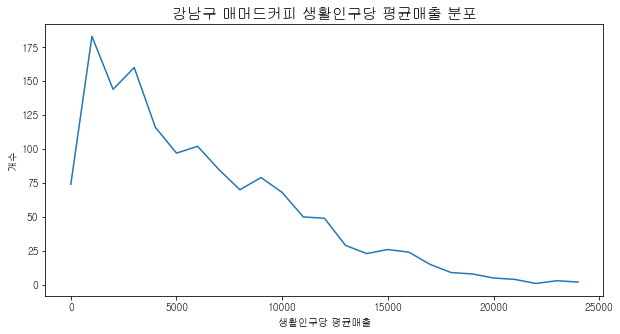

In [454]:
linePlot(mamm_full_round, "생활인구당 평균매출")

* bar plot

In [455]:
def barPlot(data, col):
    xy = np.array(sorted(Counter(data[col]).items()))
    tit = "강남구 매머드커피 " + col + " 분포"
    
    plt.figure(facecolor='white', figsize=(10, 5))
    
    x = np.arange(25)
    plt.bar(x, xy[:, 1])
    plt.xticks(x, xy[:, 0], rotation=45)
    plt.xlabel(col)
    plt.ylabel("개수")
    plt.title(tit, fontsize=15)
    
    # plt.savefig("../../../resources/plot/매머드커피/" + col + tit + "_lineplot.png")
    plt.show()

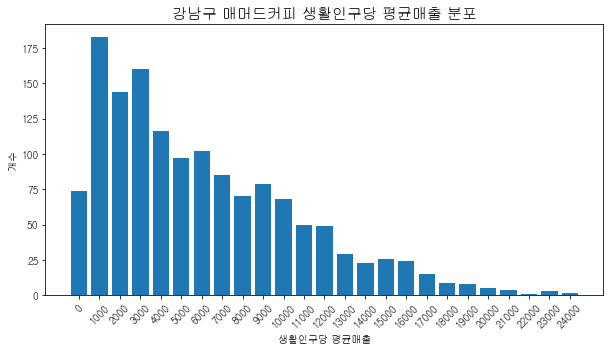

In [456]:
barPlot(mamm_full_round, "생활인구당 평균매출")

- Histogram

In [463]:
def histogram(data, col):
    xy = Counter(data[col])
    tit = "강남구 매머드커피 " + col + " 분포"
    
    plt.figure(facecolor='white', figsize=(10, 5))

    plt.hist(xy.keys(), bins=10)
    plt.xlabel(col)
    plt.ylabel("개수")
    plt.title(tit, fontsize=15)
    
    # plt.savefig("../../../resources/plot/매머드커피/" + col + tit + "_histogram.png")
    plt.show()

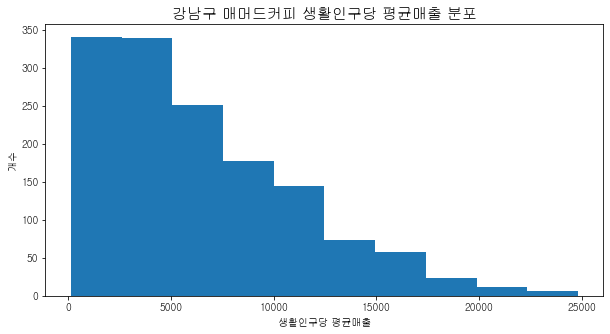

In [464]:
histogram(mamm_full, "생활인구당 평균매출")

* heat map

In [459]:
import seaborn as sns

def heatmap(data, col):
    xy = pd.DataFrame.from_records([dict(sorted(Counter(data[col]).items()))])
    tit = "강남구 매머드커피 " + col + " 분포"
    
    plt.figure(figsize=(10, 5), facecolor='white')

    sns.heatmap(xy, cmap='YlGnBu', square=True)
    plt.xticks(np.arange(0.5, len(xy.columns), 1), xy.columns)
    plt.yticks(np.arange(0.5, len(xy.index), 1), xy.index)
    plt.xlabel(col)
    plt.gca().axes.yaxis.set_visible(False)     # y축 라벨 제거
    plt.title(tit, fontsize=15)
    
    # plt.savefig("../../../resources/plot/매머드커피/" + col + tit + "_heatmap.png")


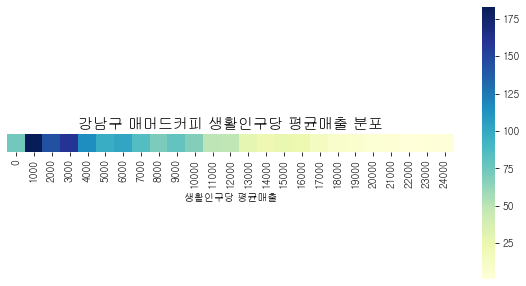

In [460]:
heatmap(mamm_full_round, "생활인구당 평균매출")

* pie chart

In [461]:
def pieChart(data, col):
    xy = np.array(sorted(Counter(data[col]).items()))
    colors = ["skyblue"] * 5 + ["lightgray"] * 20       # 0 ~ 5000 개수는 하늘색, 나머지는 회색
    wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}   # 도넛 모양으로 설정
    tit = "강남구 매머드커피 " + col + " 분포"
    
    plt.figure(facecolor='white', figsize=(20, 10))
    
    plt.pie(xy[:, 1], labels=xy[:, 0], colors=colors, wedgeprops=wedgeprops)
    plt.title(tit, fontsize=15)
    
    # plt.savefig("../../../resources/plot/매머드커피/" + col + tit + "_piechart.png")
    plt.show()

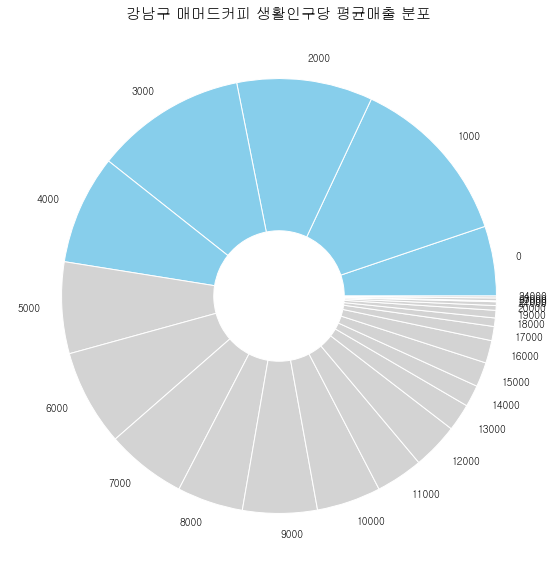

In [462]:
pieChart(mamm_full_round, "생활인구당 평균매출")